# 1. Importing libraries and data

In [13]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.

In [2]:
# importing data
path = 'C:/Users/santi/HiDrive/users/santina/02_Data Analytics/Bootcamp/06_Advanced-Analytics/02_Data/Clean Data'
df = pd.read_csv(os.path.join(path, 'suicide-rates-cleaned.csv'))

# 2. Subsetting, wrangling, and cleaning time-series data

In [28]:
type(df)

pandas.core.frame.DataFrame

In [15]:
# Renaming some columns for better interpretation
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [36]:
# We don't need the column "country-year", so we'll just drop it
df.drop("country-year", axis=1, inplace=True)
df.head()

KeyError: "['country-year'] not found in axis"

In [37]:
# We don't need the column "country", so we'll just drop it
df.drop("country", axis=1, inplace=True)
df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,1,0,21,312900,6.71,2156624900,796,2
1,1987,1,2,16,308000,5.19,2156624900,796,5
2,1987,0,0,14,289700,4.83,2156624900,796,2
3,1987,1,5,1,21800,4.59,2156624900,796,1
4,1987,1,1,9,274300,3.28,2156624900,796,0


In [39]:
# We don't need the column "sex", so we'll just drop it
df.drop("sex", axis=1, inplace=True)
df.head()

,year,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,0,21,312900,6.71,2156624900,796,2
1,1987,2,16,308000,5.19,2156624900,796,5
2,1987,0,14,289700,4.83,2156624900,796,2
3,1987,5,1,21800,4.59,2156624900,796,1
4,1987,1,9,274300,3.28,2156624900,796,0


In [40]:
# We don't need the column "age", so we'll just drop it
df.drop("age", axis=1, inplace=True)
df.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,21,312900,6.71,2156624900,796,2
1,1987,16,308000,5.19,2156624900,796,5
2,1987,14,289700,4.83,2156624900,796,2
3,1987,1,21800,4.59,2156624900,796,1
4,1987,9,274300,3.28,2156624900,796,0


In [41]:
# We don't need the column "population", so we'll just drop it
df.drop("population", axis=1, inplace=True)
df.head()

,year,suicides_no,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,21,6.71,2156624900,796,2
1,1987,16,5.19,2156624900,796,5
2,1987,14,4.83,2156624900,796,2
3,1987,1,4.59,2156624900,796,1
4,1987,9,3.28,2156624900,796,0


In [42]:
# We don't need the column "suicides_no", so we'll just drop it
df.drop("suicides_no", axis=1, inplace=True)
df.head()

,year,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,6.71,2156624900,796,2
1,1987,5.19,2156624900,796,5
2,1987,4.83,2156624900,796,2
3,1987,4.59,2156624900,796,1
4,1987,3.28,2156624900,796,0


In [43]:
# We don't need the column "gdp_for_year", so we'll just drop it
df.drop("gdp_for_year", axis=1, inplace=True)
df.head()

,year,suicides/100k pop,gdp_per_capita,generation
0,1987,6.71,796,2
1,1987,5.19,796,5
2,1987,4.83,796,2
3,1987,4.59,796,1
4,1987,3.28,796,0


In [44]:
# We don't need the column "gdp_per_capita", so we'll just drop it
df.drop("gdp_per_capita", axis=1, inplace=True)
df.head()

,year,suicides/100k pop,generation
0,1987,6.71,2
1,1987,5.19,5
2,1987,4.83,2
3,1987,4.59,1
4,1987,3.28,0


In [45]:
# We don't need the column "generation", so we'll just drop it
df.drop("generation", axis=1, inplace=True)
df.head()

,year,suicides/100k pop
0,1987,6.71
1,1987,5.19
2,1987,4.83
3,1987,4.59
4,1987,3.28


In [52]:
# Set the "Date" column as the index

from datetime import datetime

df['date'] = pd.to_datetime(df['year']) # Create a datetime column from "Date.""
df = df.set_index('year') # Set the datetime as the index of the dataframe.

In [53]:
df.head()

,suicides/100k pop,date
year,,
1987,6.71,1970-01-01 00:00:00.000001987
1987,5.19,1970-01-01 00:00:00.000001987
1987,4.83,1970-01-01 00:00:00.000001987
1987,4.59,1970-01-01 00:00:00.000001987
1987,3.28,1970-01-01 00:00:00.000001987


In [54]:
# We don't need the column "date", so we'll just drop it
df.drop("date", axis=1, inplace=True)
df.head()


,suicides/100k pop
year,
1987,6.71
1987,5.19
1987,4.83
1987,4.59
1987,3.28


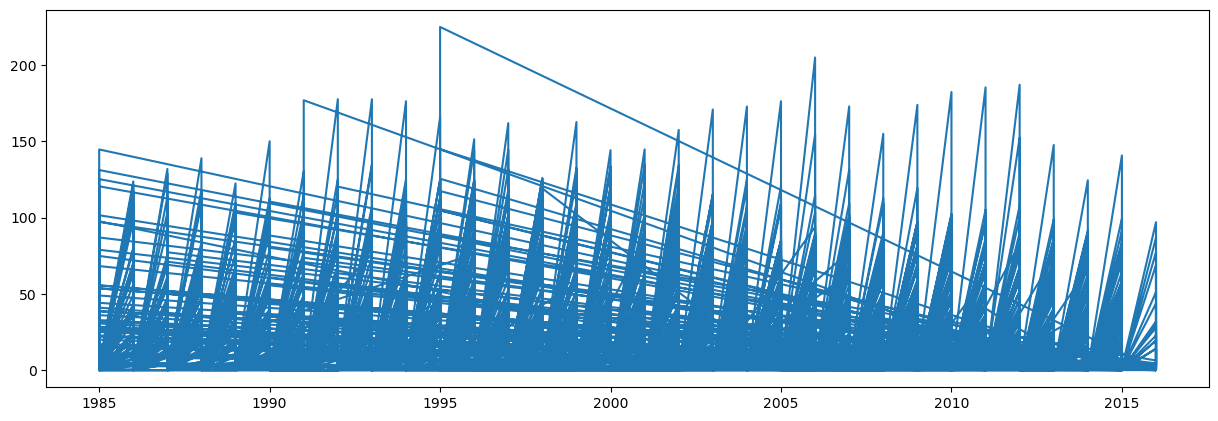

In [55]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [56]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

suicides/100k pop    0
dtype: int64

In [57]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

22522

In [59]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [46]:
df.columns

Index(['year', 'suicides/100k pop'], dtype='object')

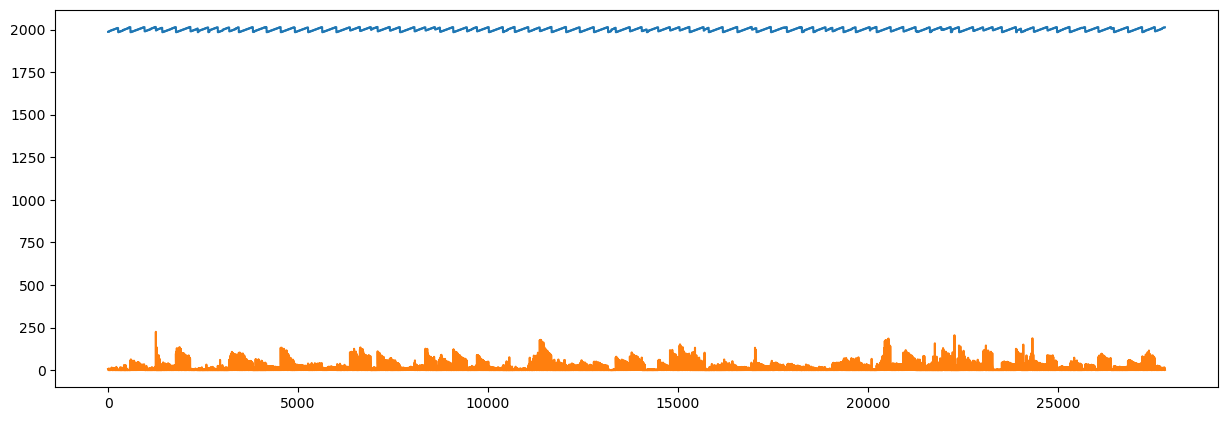

In [47]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

In [17]:
(df.dtypes=="object").index[df.dtypes=="object"]

Index(['country', 'sex', 'age', 'gdp_for_year', 'generation'], dtype='object')

In [18]:
# Turning object types into category and integer types
df[["country","age","sex","generation"]] = df[["country","age","sex","generation"]].astype("category")

In [19]:
# Converting number strings with commas into integer
df['gdp_for_year'] = df['gdp_for_year'].str.replace(",","").astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   sex                27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides/100k pop  27820 non-null  float64 
 7   gdp_for_year       27820 non-null  int64   
 8   gdp_per_capita     27820 non-null  int64   
 9   generation         27820 non-null  category
dtypes: category(4), float64(1), int64(5)
memory usage: 1.4 MB


In [20]:
df.dtypes

country              category
year                    int64
sex                  category
age                  category
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_for_year            int64
gdp_per_capita          int64
generation           category
dtype: object

In [21]:
# Using cat.codes method to convert category into numerical labels
columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda fx: fx.cat.codes)
df.dtypes

country                 int8
year                   int64
sex                     int8
age                     int8
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation              int8
dtype: object

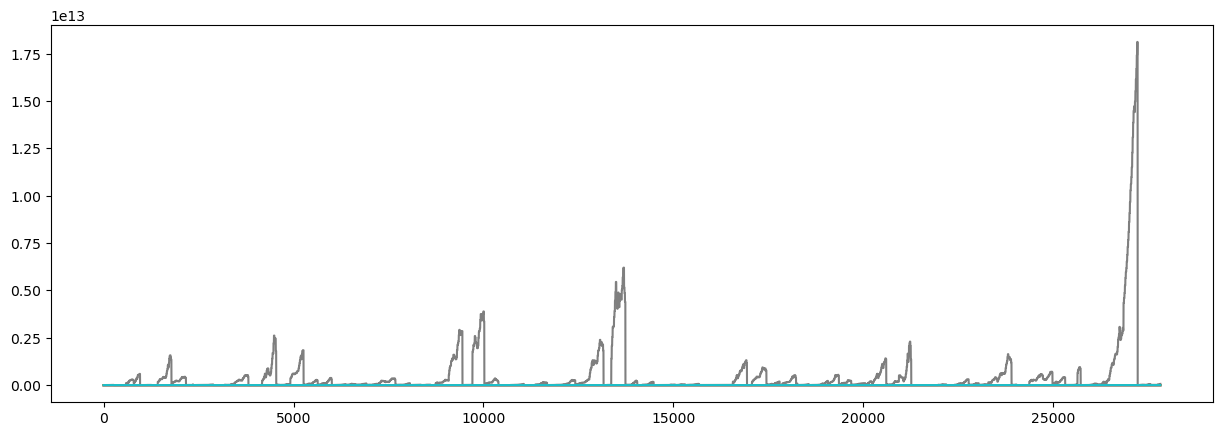

In [33]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

# 2. Subsetting the data

In [23]:
# create a subset of the data for people aged 15-24 in Germany
gerdf = df.loc[(df.country=='Germany') & (df.age=='15-24 years'), :]

# 3. Creating a linechart + decompose

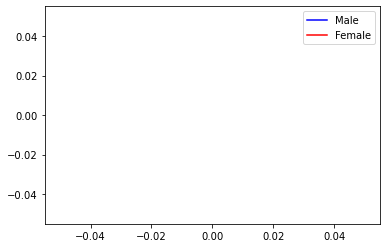

In [24]:
# plot suicide rates for youth 15-24 in Germany with matplotlib
plt.plot('year','suicides/100k pop', data=gerdf.loc[gerdf.sex=='male',:], c='blue')
plt.plot('year','suicides/100k pop', data=gerdf.loc[gerdf.sex=='female',:], c='red')
plt.legend(('Male','Female'))
plt.show()

In [34]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

Create a line chart of your data.
Decompose the data’s components.

    Analyze the results from the plot in a markdown cell.

Conduct a Dickey-Fuller test to check for stationarity.

    Interpret the results in a markdown cell and reference your null hypothesis.

If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
If your data still isn’t stationary, perform another round of differencing and repeat step 6.
Check your data’s autocorrelations.